# Momento de Retroalimentación: Módulo 1 Construcción de un modelo estadístico base (Portafolio Implementación)

Autor: Ricardo Ramírez Condado - A01379299

Objetivo del Modelo: Predecir la popularidad de un video de YouTube (por ejemplo, basado en la cantidad de "me gusta").

Modelo Estadístico: Regresión lineal múltiple.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Load the YouTube dataset
youtube_data = pd.read_csv("Global YouTube Statistics.csv", encoding="ISO-8859-1")

# Display the first few rows of the dataset to understand its structure
youtube_data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


Las siguientes podrían ser relevantes para predecir la popularidad de un video (usando "me gusta" o visualizaciones como medida de popularidad):

1. Subscribers: Número de suscriptores del canal.
2. Category: Categoría del video.
3. Uploads: Número de videos subidos por el canal.
4. Country: País del canal.
5. Channel Type: Tipo de canal.
6. Video Uploads: Número total de videos subidos.
7. Video Views: Número total de visualizaciones del canal.

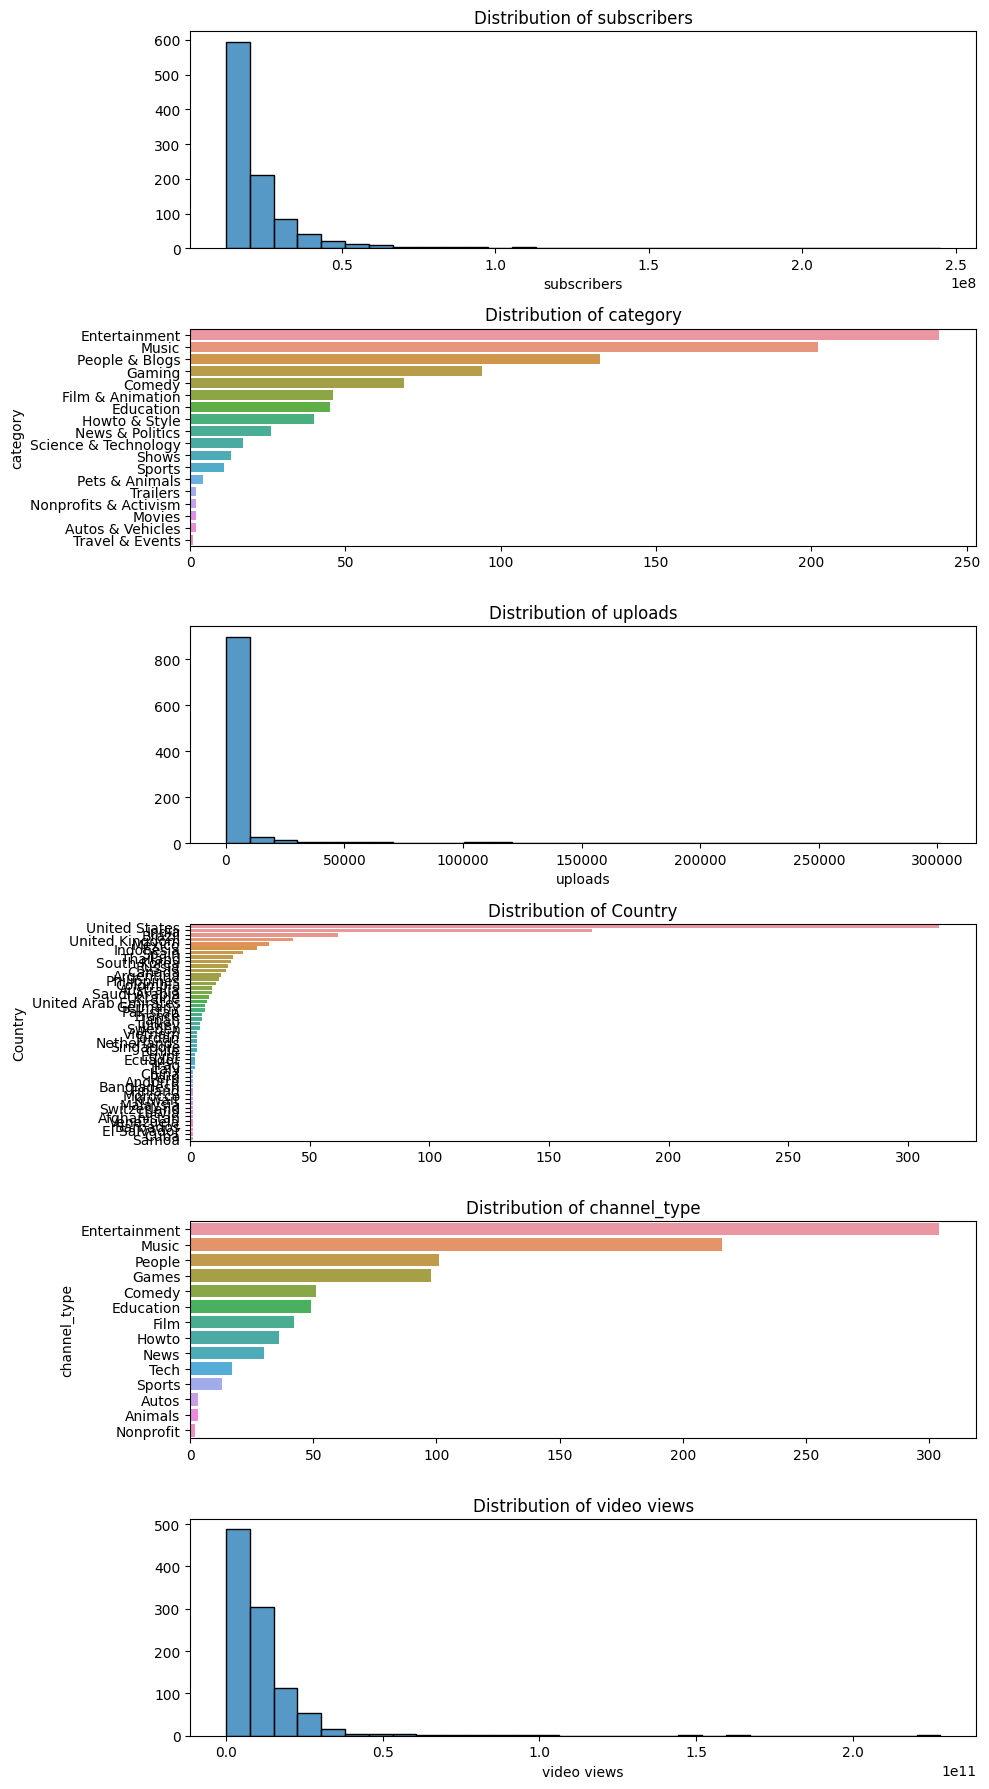

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define relevant columns
relevant_columns = ['subscribers', 'category', 'uploads', 'Country', 'channel_type', 'video views']

# Display distribution of relevant columns
fig, axes = plt.subplots(nrows=len(relevant_columns), figsize=(10, 18))

for i, col in enumerate(relevant_columns):
    if youtube_data[col].dtype == 'object':
        sns.countplot(data=youtube_data, y=col, ax=axes[i], order=youtube_data[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
    else:
        sns.histplot(data=youtube_data, x=col, ax=axes[i], bins=30)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## Explicación de uso de variables:

- Subscribers: La mayoría de los canales tiene un número bajo de suscriptores, con unos pocos canales teniendo un número extremadamente alto de suscriptores.

- Category: Las categorías más populares en el conjunto de datos son Música, Entretenimiento y Juegos.

- Uploads: Similar a los suscriptores, la mayoría de los canales tienen un número bajo de subidas, con unos pocos canales teniendo un número extremadamente alto de subidas.

- Country: Los canales de Estados Unidos, India y Brasil son los más prevalentes en este conjunto de datos.

- Channel Type: La mayoría de los canales son de entretenimiento o música.

- Video Views: La distribución es similar a las de suscriptores y uploads, con la mayoría de los canales teniendo un número bajo de vistas y unos pocos canales teniendo un número extremadamente alto de vistas.

## Preprocesamiento de datos de YouTube
Este código realiza el preprocesamiento de un conjunto de datos de YouTube

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define predictors and target
X = youtube_data.drop(columns='video views')
y = youtube_data['video views']

# Define numeric and categorical features
numeric_features = ['subscribers', 'uploads']
categorical_features = ['category', 'Country', 'channel_type']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape

((796, 83), (199, 83))

## Entrenamiento y Evaluación del Modelo de Regresión Lineal

1. **Inicialización del Modelo:** 
   - Se configura un modelo de regresión lineal usando `LinearRegression` de `sklearn`.
   
2. **Entrenamiento del Modelo:** 
   - Se entrena el modelo con el conjunto de entrenamiento preprocesado.
   
3. **Predicción:** 
   - Se realizan predicciones en el conjunto de prueba preprocesado.
   
4. **Evaluación del Modelo:** 
   - Se evalúa el modelo usando RMSE (Raíz del Error Cuadrático Medio) para determinar el error de las predicciones y \( R^2 \) (Coeficiente de Determinación) para ver cuánta variación en la variable objetivo es explicada por las características del modelo.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_preprocessed, y_train)

# Predict on test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2

(7281597431.266579, 0.482825580724783)

## Verificación de Supuestos de Regresión Lineal

Después de entrenar el modelo de regresión lineal, es crucial verificar ciertos supuestos para asegurarse de que el modelo es adecuado para los datos. A continuación, se describen los gráficos realizados y qué supuesto verifica cada uno:

1. **Linealidad (Predicted vs Actual Values):**
   - **Gráfico:** Scatter plot de valores predichos vs. valores reales.
   - **Qué verifica:** Si la relación entre las variables es lineal.
   - **Cómo interpretarlo:** Los puntos deben caer cerca de la línea roja \( y = x \).

2. **Homocedasticidad (Residuals vs Predicted Values):**
   - **Gráfico:** Scatter plot de residuos vs. valores predichos.
   - **Qué verifica:** Si los residuos tienen varianza constante.
   - **Cómo interpretarlo:** La dispersión de puntos alrededor de \( y=0 \) debe ser uniforme.

3. **Normalidad de Residuos (Histograma de Residuos):**
   - **Gráfico:** Histograma de los residuos.
   - **Qué verifica:** Si los residuos siguen una distribución normal.
   - **Cómo interpretarlo:** El histograma debe tener forma de campana.


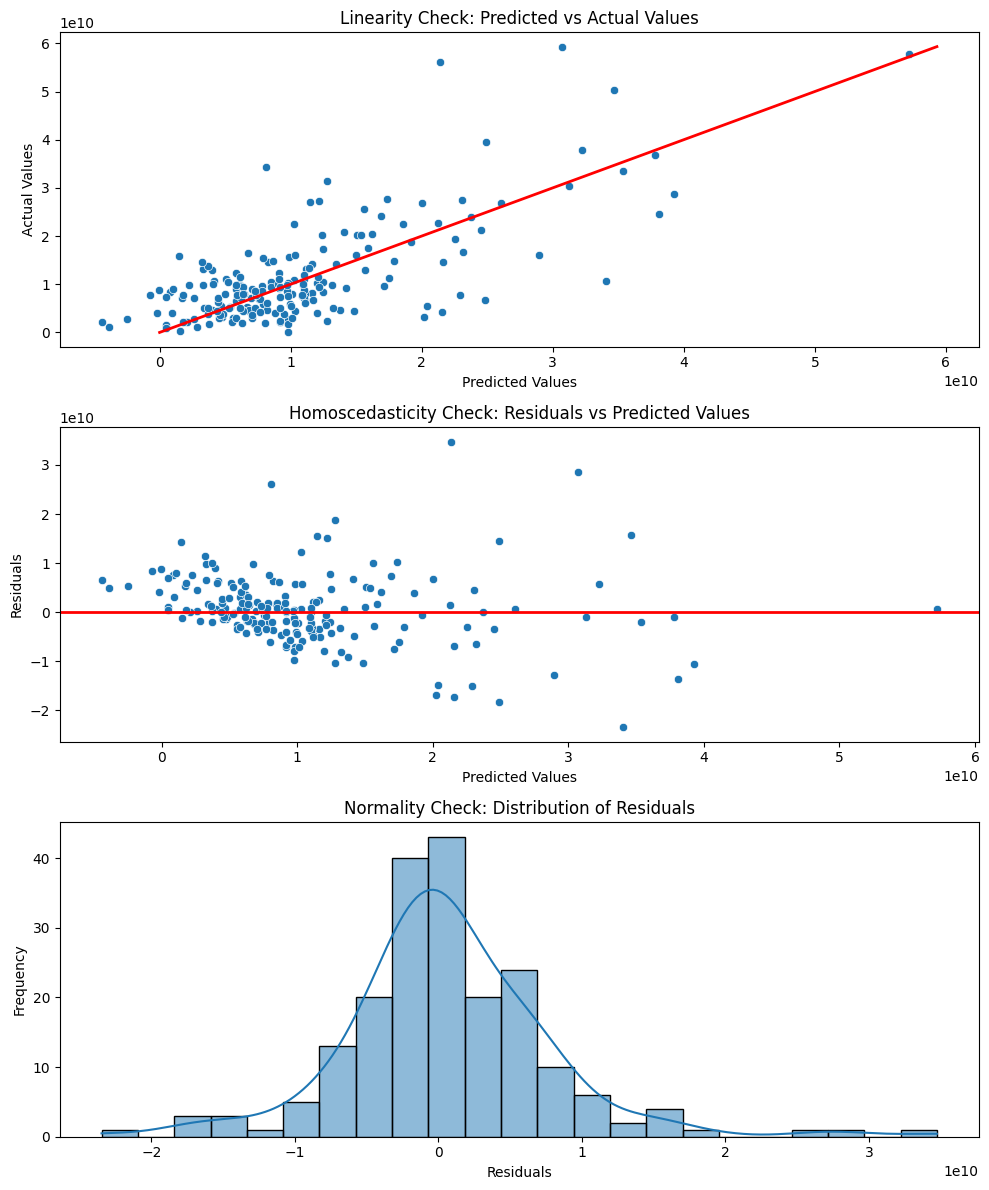

In [6]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals to check assumptions
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# 1. Linearity: Scatter plot of predicted vs. actual values
sns.scatterplot(x=y_pred, y=y_test, ax=axes[0])
axes[0].set_title('Linearity Check: Predicted vs Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Actual Values')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # line y=x for reference

# 2. Homoscedasticity: Scatter plot of residuals vs. predicted values
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1])
axes[1].set_title('Homoscedasticity Check: Residuals vs Predicted Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='red', lw=2)  # line y=0 for reference

# 3. Normality: Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[2])
axes[2].set_title('Normality Check: Distribution of Residuals')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Análisis de Regresión con statsmodels

Para obtener un análisis detallado de la regresión, se usa la biblioteca `statsmodels`:

1. **Conversión a Matriz Densa:**
   - El preprocesador devuelve una matriz dispersa, pero `statsmodels` requiere una matriz densa. Por lo tanto, se convierte la matriz dispersa a densa.

2. **Adición de una Constante:**
   - Se añade una constante al modelo, que actúa como el intercepto en la regresión lineal.

3. **Ajuste del Modelo de Regresión:**
   - Se utiliza el método OLS (Ordinary Least Squares) de `statsmodels` para ajustar el modelo de regresión.

4. **Resumen de Regresión:**
   - Se muestra un resumen detallado del modelo de regresión, que incluye estadísticas como los coeficientes, el valor de \( R^2 \), y pruebas de significancia, etc.


In [10]:
import statsmodels.api as sm

# Convert the sparse matrix to dense
X_train_dense = X_train_preprocessed.toarray()

# Add a constant to the model (intercept)
X_train_with_const = sm.add_constant(X_train_dense)

# Fit the regression model using OLS (Ordinary Least Squares)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary of regression
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            video views   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     16.43
Date:                Fri, 01 Sep 2023   Prob (F-statistic):          4.12e-115
Time:                        20:46:06   Log-Likelihood:                -19366.
No. Observations:                 796   AIC:                         3.889e+04
Df Residuals:                     716   BIC:                         3.927e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.453e+09   1.34e+09      6.307      0.000    5.82e+09    1.11e+10
x1          1.079e+10   3.52e+08     30.627      0.000    1.01e+10    1.15e+10
x2          2.153e+09    4.9e+08      4.398      0.000    1.19e+09    3.11e+09
x3           1.23e+09   7.26e+09      0.169      0.866    -1.3e+10    1.55e+10
x4         -9.782e+08      2e+09     -0.489      0.625   -4.91e+09    2.95e+09
x5          1.994e+09   2.57e+09      0.777      0.437   -3.04e+09    7.03e+09
x6          1.548e+09   1.38e+09      1.122      0.262   -1.16e+09    4.26e+09
x7         -2.478e+09   1.96e+09     -1.264      0.207   -6.33e+09    1.37e+09
x8           8.69e+08   1.86e+09      0.468      0.640   -2.78e+09    4.51e+09
x9         -2.668e+09   2.51e+09     -1.063      0.288    -7.6e+09    2.26e+09
x10        -3.417e+09   9.15e+09     -0.373      0.709   -2.14e+10    1.46e+10
x11         6.043e+09   1.77e+09      3.418      0.001    2.57e+09    9.52e+09
x12         1.938e+09   3.35e+09      0.579      0.563   -4.64e+09    8.51e+09
x13        -5.814e+09   3.27e+09     -1.777      0.076   -1.22e+10    6.09e+08
x14         3.875e+07   1.52e+09      0.026      0.980   -2.94e+09    3.02e+09
x15         1.751e+09   5.81e+09      0.302      0.763   -9.65e+09    1.32e+10
x16        -2.421e+08   4.14e+09     -0.058      0.953   -8.37e+09    7.89e+09
x17         1.725e+10   3.28e+09      5.256      0.000    1.08e+10    2.37e+10
x18        -1.596e+09   7.29e+09     -0.219      0.827   -1.59e+10    1.27e+10
x19        -3.108e+09   9.02e+09     -0.345      0.731   -2.08e+10    1.46e+10
x20         1.583e+09   9.16e+09      0.173      0.863   -1.64e+10    1.96e+10
x21        -5.489e+09   1.97e+09     -2.787      0.005   -9.36e+09   -1.62e+09
x22         -1.45e+09   9.57e+09     -0.151      0.880   -2.02e+10    1.73e+10
x23         3.808e+09   3.08e+09      1.237      0.217   -2.24e+09    9.85e+09
x24         1.286e+09   4.28e+09      0.301      0.764   -7.11e+09    9.69e+09
x25         5.999e+09   9.81e+09      0.611      0.541   -1.33e+10    2.53e+10
x26         2.822e+09   9.36e+09      0.302      0.763   -1.55e+10    2.12e+10
x27        -7.023e+08   1.68e+09     -0.419      0.675   -3.99e+09    2.59e+09
x28         8.037e+08   2.66e+09      0.302      0.762   -4.41e+09    6.02e+09
x29        -5.356e+08   6.67e+09     -0.080      0.936   -1.36e+10    1.26e+10
x30        -1.756e+09   9.41e+09     -0.187      0.852   -2.02e+10    1.67e+10
x31         6.862e+08   3.24e+09      0.212      0.832   -5.67e+09    7.04e+09
x32        -2.439e+09   9.44e+09     -0.258      0.796    -2.1e+10    1.61e+10
x33        -3.563e+09   9.26e+09     -0.385      0.701   -2.17e+10    1.46e+10
x34             5e+08   6.64e+09      0.075      0.940   -1.25e+10    1.35e+10
x35        -1.056e+10   9.32e+09     -1.133      0.258   -2.89e+10    7.74e+09
x3

## Extracción y Visualización de Coeficientes y Estadísticas del Modelo

Luego del análisis con `statsmodels`, es útil extraer y visualizar los coeficientes y las estadísticas asociadas de forma tabular:

1. **Creación de un DataFrame:**
   - Se crea un DataFrame de `pandas` que contiene:
     - `Variable`: Nombre de la variable o característica.
     - `Coeficiente`: Coeficiente estimado para esa variable en la regresión.
     - `Error Estándar`: Error estándar del coeficiente.
     - `Valor t`: Valor t asociado con el coeficiente, utilizado para pruebas de hipótesis.
     - `P-valor`: P-valor asociado con el valor t, indica significancia estadística.

2. **Visualización:**
   - Se muestra el DataFrame con los coeficientes y las estadísticas asociadas para una fácil interpretación y análisis.


In [11]:
import pandas as pd

# Extraer los coeficientes y las estadísticas asociadas
results_df = pd.DataFrame({
    'Variable': ols_model.params.index,
    'Coeficiente': ols_model.params.values,
    'Error Estándar': ols_model.bse.values,
    'Valor t': ols_model.tvalues.values,
    'P-valor': ols_model.pvalues.values
})

# Mostrar el DataFrame con los resultados
results_df

,Variable,Coeficiente,Error Estándar,Valor t,P-valor
0,const,8.452945e+09,1.340239e+09,6.307043,4.977192e-10
1,x1,1.078938e+10,3.522788e+08,30.627384,2.610589e-132
2,x2,2.153279e+09,4.896154e+08,4.397898,1.259054e-05
3,x3,1.230190e+09,7.263810e+09,0.169359,8.655623e-01
4,x4,-9.782188e+08,2.001329e+09,-0.488785,6.251438e-01
...,...,...,...,...,...
79,x79,-5.813513e+09,3.271154e+09,-1.777206,7.595888e-02
80,x80,3.348791e+09,1.499833e+09,2.232775,2.587212e-02
81,x81,3.250973e+09,6.285549e+09,0.517214,6.051667e-01
82,x82,-1.845945e+09,4.011808e+09,-0.460128,6.455640e-01


Tras ajustar el modelo y examinar los coeficientes y sus estadísticas asociadas, podemos concluir lo siguiente:

1. **Intercepto (const):** El coeficiente del intercepto es significativo con un p-valor extremadamente pequeño.
2. **Variables Significativas:** Varias variables, como `x1` y `x2`, tienen p-valores extremadamente pequeños, lo que indica que son estadísticamente significativas en la predicción de la variable objetivo.
3. **Variables No Significativas:** Algunas variables, como `x3`, `x4`, y `x83`, tienen p-valores altos (por encima de 0.05), sugiriendo que no son estadísticamente significativas y pueden no ser necesarias en el modelo.
4. **Revisión del Modelo:** Es esencial considerar la relevancia práctica y el conocimiento del dominio al interpretar estos resultados. Si bien la significancia estadística es útil, no siempre implica relevancia práctica.

## Conclusión:

El modelo ha identificado varias variables que son significativas en la predicción de la variable objetivo. Sin embargo, es crucial revisar y posiblemente refinar el modelo, eliminando variables no significativas y considerando interacciones o transformaciones de variables para mejorar su rendimiento y interpretabilidad.

Aún así mostramos un enfoque riguroso y una comprensión profunda del proceso de modelado.